In [14]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from scipy.stats import skew
from scipy.stats import norm
from scipy import stats
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
import datetime
import seaborn as sns
%matplotlib inline
sns.set()

In [15]:
data = pd.read_csv('F:\\python py\\pandas\\project\\Book1.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1998-08-27,17.879700,18.115601,17.549500,17.7146,0.697660,44093886.0
1,1998-08-28,17.511700,17.511700,16.983400,17.0777,0.672577,41041489.0
2,1998-08-31,17.106001,17.398500,17.063601,17.2381,0.678894,27554240.0
3,1998-09-01,17.200399,17.200399,16.606001,16.8041,0.661801,31287067.0
4,1998-09-02,17.077700,17.252300,17.007000,17.1579,0.675735,20362030.0


In [16]:
d = data.dropna()
d.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5028,2018-08-17,295.000000,302.700012,294.049988,302.100006,302.100006,21931134.0
5029,2018-08-20,304.100006,308.700012,303.600006,307.649994,307.649994,20240462.0
5030,2018-08-21,308.299988,308.850006,303.350006,307.000000,307.000000,14139592.0
5031,2018-08-23,306.950012,306.950012,298.299988,302.450012,302.450012,22721004.0
5032,2018-08-24,300.600006,305.700012,299.000000,300.450012,300.450012,18869585.0


In [17]:
dt = d['Date'].values
dt

array(['1998-08-27', '1998-08-28', '1998-08-31', ..., '2018-08-21',
       '2018-08-23', '2018-08-24'], dtype=object)

In [18]:
dt.astype('datetime64[D]').dtype

dtype('<M8[D]')

In [19]:
d['Date']=dt.astype('datetime64[D]').astype(int)
d.head()

F:\SetUp\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Date,Open,High,Low,Close,Adj Close,Volume
0,10465,17.879700,18.115601,17.549500,17.7146,0.697660,44093886.0
1,10466,17.511700,17.511700,16.983400,17.0777,0.672577,41041489.0
2,10469,17.106001,17.398500,17.063601,17.2381,0.678894,27554240.0
3,10470,17.200399,17.200399,16.606001,16.8041,0.661801,31287067.0
4,10471,17.077700,17.252300,17.007000,17.1579,0.675735,20362030.0


In [20]:
d.dtypes

Date           int32
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

F:\SetUp\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


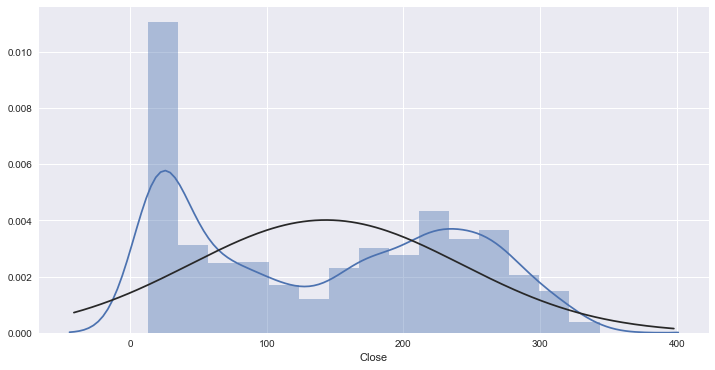

In [21]:
plt.figure(figsize=(12,6))
sns.distplot(d['Close'], fit=norm)

In [22]:
Date = np.array(d.Date)
Price = np.array(d.Close)
Date.shape

(4952,)

In [23]:
X = Date.reshape(Date.shape[0],1)
y = Price.reshape(Price.shape[0],1)
X.shape,y.shape

((4952, 1), (4952, 1))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

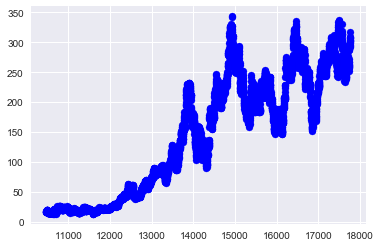

In [25]:
plt.scatter(X,y,color='blue')
plt.show()

In [26]:
linear_model_ = linear_model.LinearRegression()
linear_model_.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
print('R-squared score (training): {:.3f}'
     .format(linear_model_.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linear_model_.score(X_test, y_test)))

R-squared score (training): 0.842
R-squared score (test): 0.859


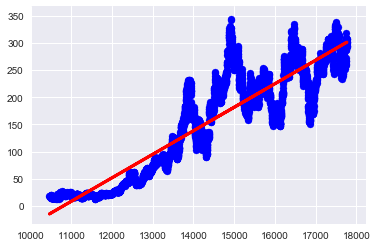

In [28]:
plt.plot(X_train,linear_model_.predict(X_train),color='red',linewidth=3)
plt.scatter(X,y,color='blue')
plt.show()

In [29]:
print(linear_model_.coef_)
print(linear_model_.intercept_)

[[0.04323452]]
[-466.76516718]


In [30]:
#A new input to predict
Dates = ['2018-08-30','2018-08-31','2018-08-01','2018-08-02','2018-08-03']
for das in Dates:
    s = das
    temp_date = time.mktime(datetime.datetime.strptime(s, "%Y-%m-%d").timetuple())

    df = pd.DataFrame({'Date': [temp_date]})

    predicted_price =linear_model_.predict(df)
    print(predicted_price)

[[66389052.27020156]]
[[66392787.7327053]]
[[66280723.85759328]]
[[66284459.32009702]]
[[66288194.78260075]]
